August 2015  
Modified September 2017

Author: FBB

** reproduce the result in **
http://www.mdrc.org/sites/default/files/What%20Strategies%20Work%20for%20the%20Hard%20FR.pdf 

**Edited by uc288 for HW4**

Populating the interactive namespace from numpy and matplotlib


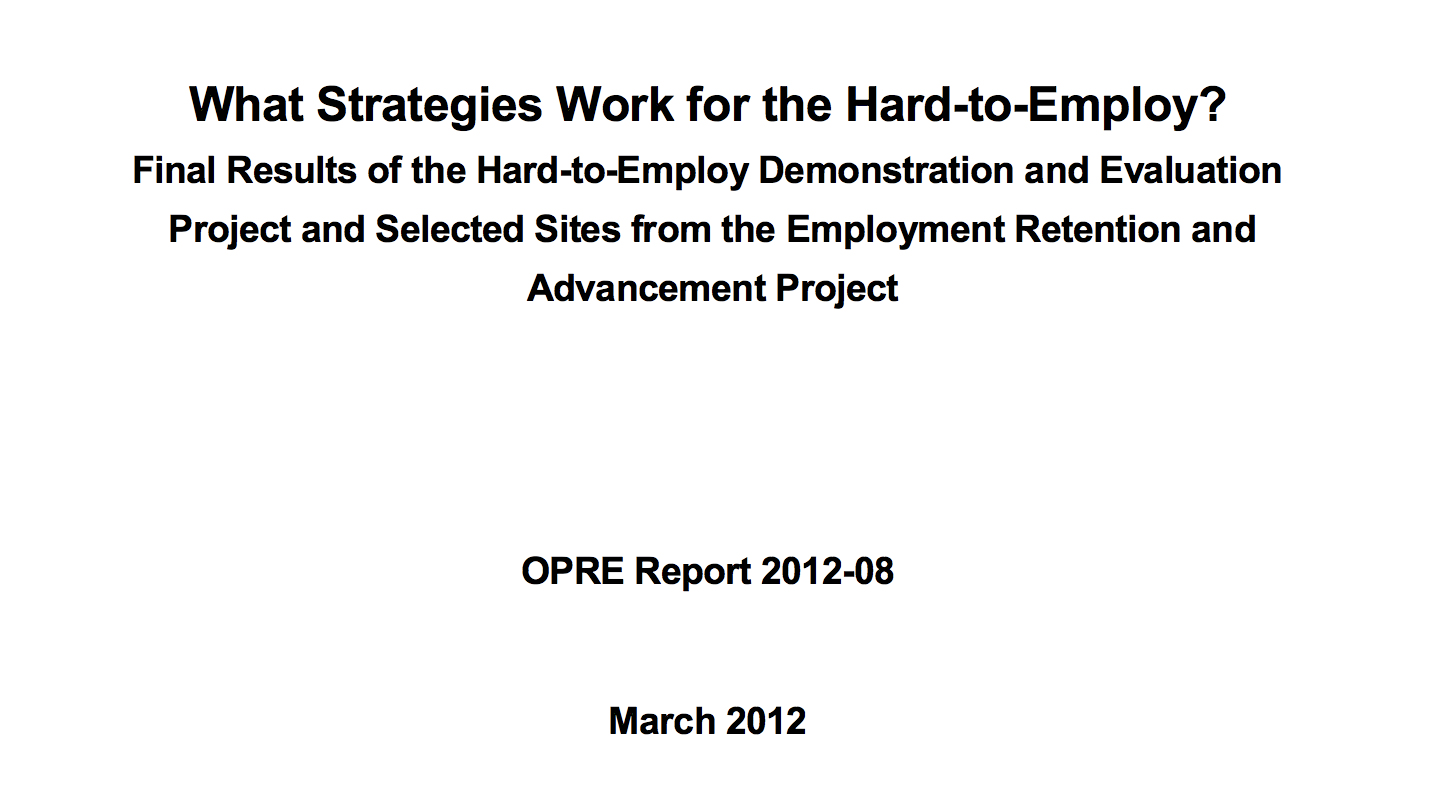

In [1]:
import os
import sys
import numpy as np
import pylab as pl

import json
import os

%pylab inline

from IPython.display import Image
Image(filename='./screenshots/NYCReentryprogram_title.png')

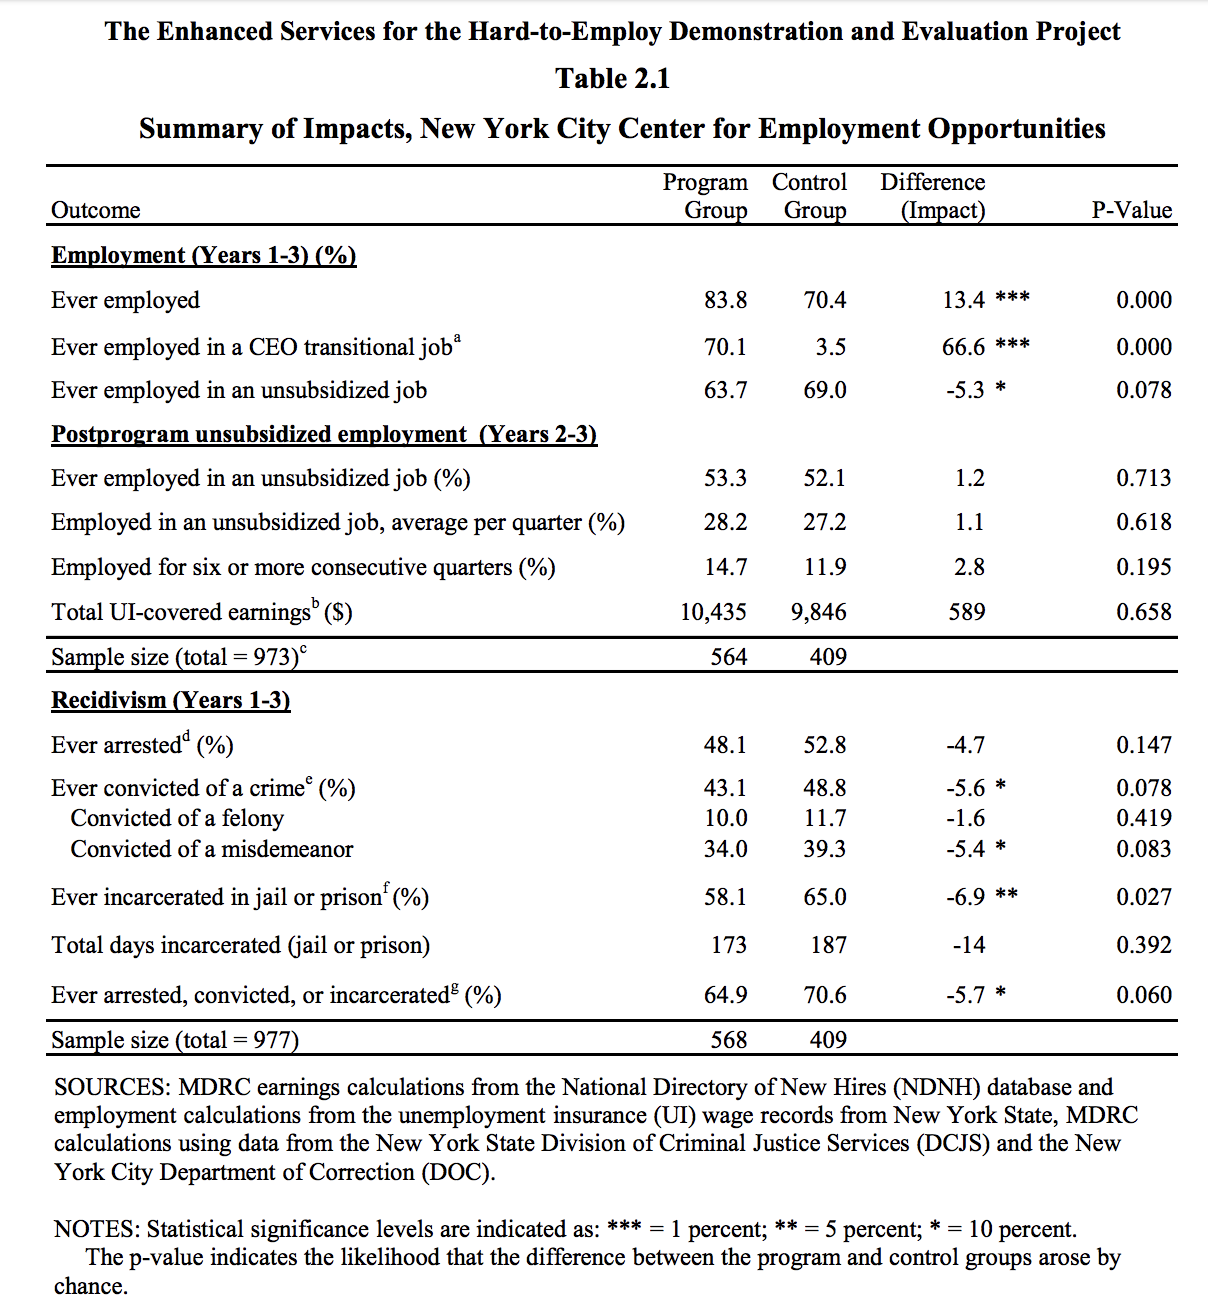

In [2]:
Image(filename='./screenshots/NYCReentryprogram.png')

# NULL HYPOTHESIS: the % of former prisoners employed after release is the same or lower for candidates who participated in the program as for the control group, significance level p=0.05

** $H_0: P_0 - P_1 \geq$    0 **
    
** $H_a: P_0 - P_1 $< 0    **
    
    
** $\alpha$ = 0.05    **

** this is a TEST OF PROPORTIONS. we use the Binomial distribution since it is a yes/no (bernulli) test for each subject: the former inmate was or was not ever employed in a CEO transitional job (second row in the table above): **

** $P_0=0.035, P_1=0.701$**

In [3]:
alpha=0.05
# we like fractions better then percentages. as a rule of thumb, either use fractions or counts
P_0 = 3.5 * 0.01 
P_1 = 70.1 * 0.01

if P_0 - P_1 >= 0:
    # we are done
    print ("the Null holds")
else:
    print ("we must assess the statistical significance")

n_0 = 409
n_1 = 564

#lets get the counts by multiplying by the sample size
Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1


we must assess the statistical significance


 samples, categorical data
 
 ** TWO OPTIONS z test, or chi-square test.  **

# START WITH Z TEST

** the z test compares the stanrard deviation of the expected distribution and the observed result. it tells you literally how many standard deviations from the tail an observation is, under the _assumption of normality_ **


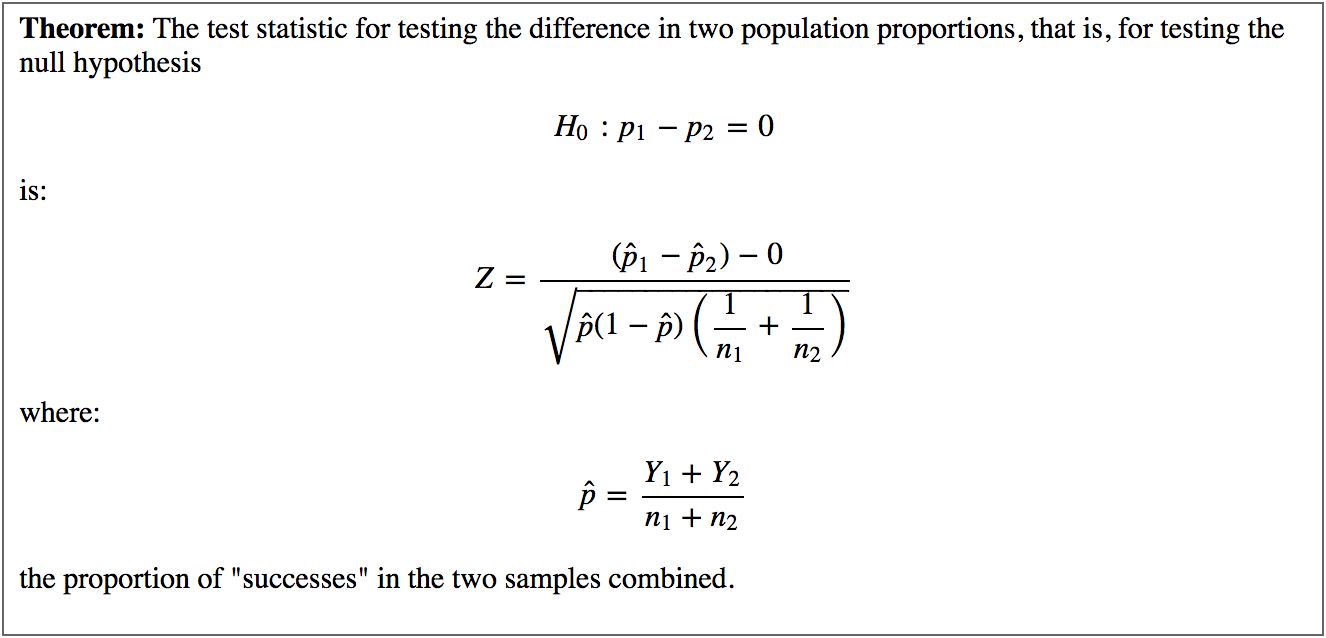

In [4]:
Image("./screenshots/ztest.png")
#https://onlinecourses.science.psu.edu/stat414/node/268

must define the sample standard deviation (standard error)

In [5]:
#define the sample proportion first
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print (sp)

0.4210472764645426


** standard deviation of the sampling distribution the distribution is Binomial, the binomial stdev is **

(see a proof here!: http://stats.stackexchange.com/questions/29641/standard-error-for-the-mean-of-a-sample-of-binomial-random-variables!): 

$\sqrt{\frac{p(1 - p)}{n}}$

for 2 samples this becomes 

$\sqrt{ \frac{ \hat{p}(1 - \hat{p})} {n0} + \frac{ \hat{p}(1 - \hat{p})} {n1} }$

cfr: page 138 of Statistics in a Nutshell, eq. 5.12 and here http://stattrek.com/hypothesis-test/difference-in-proportions.aspx?Tutorial=AP

** $\hat{p} =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$ **


Note that in the online version of Statistics in a Nutshell, $\bar{x}$  should be  $\hat{p}$!!

In [6]:
# I am gonna create a little one line function to calculate the standard error
# and to calculate p

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) 

** z score: how many standard deviation away from the population parameter is my statistic? **

 $z=\frac{P_1-P_0}{\sigma}$

In [7]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z_2y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print (z_2y)

20.7697865408


note that using p0-p1 or p1-p0 at the numerator is equivalent because the standardizes normal value of z has mean 0 (see image below) so that we can use the absolute value of the z score, or equivalently look for $P[Z<z]$ if z is positive, and $P[Z>z]$ if z is negative.

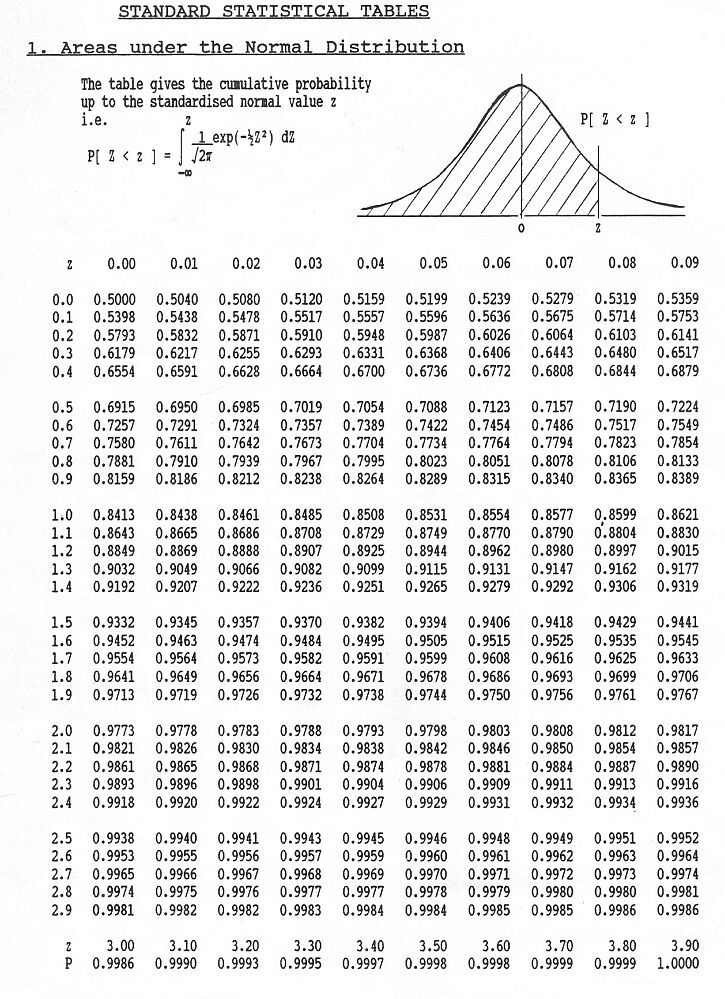

In [8]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

* if $p<\alpha$ : reject H0 **

IMPORTANT!! note that this P in the bottom line of the table is not the p-value, but 

p-value = 1-P

In [9]:
## p-value for employment after 2 years: 
## since the largest number we read off the table for is (way) smaller 
## than the value for our statistic 
## our p-value will be smaller than it would be if calculated using 
## (e.g.) .9998 (and in fact using 1.0000 which is the largest number 
## in the table). Using 0.9998 is a **conservative** approach. 

p_2y = 1 - 0.9984


def report_result(p,a):
    print ('Is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('The Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_2y, alpha)

Is the p value 0.00 smaller than the critical value 0.05?
YES!
The Null hypothesis is rejected


# Question: What if we used the values for where the former inmate was or was not "Convicted of a felony" (row 10) in the Recidivism (Years 1-3)?

*START EDIT BY uc288*

## NULL HYPOTHESIS
## The % of of former prisoners convicted of a felony after a release is the same or higher for candidates who participated in the program $P_1$ than those in the control group $P_0$, significance level p=0.05.

$H_0 = P_1 - P_0 >= 0$

$H_a = P_1 - P_0 < 0$

$P_0 = 0.117, P_1= 0.10$

In [10]:
alpha=0.05

P_0 = 11.7 * 0.01 
P_1 = 10.0 * 0.01

if P_1 - P_0 >= 0:
    # we are done
    print ("The Null holds")
else:
    print ("We must assess the statistical significance!")

n_0 = 409
n_1 = 568

# lets get the counts by multiplying by the sample size
Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1

# define the sample proportion first
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print ("The sample proportion is: {:.2f}".format(sp))

# compute for the z-score
z_3y = zscore(P_0, P_1, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print ("The z-score for this hypothesis is: {:.4f}".format(z_3y))

We must assess the statistical significance!
The sample proportion is: 0.11
The z-score for this hypothesis is: 0.8476


In [11]:
p_3y= 1 - 0.7995

report_result(p_3y, alpha)

Is the p value 0.20 smaller than the critical value 0.05?
NO!
The Null hypothesis is not rejected


### Comments:
This is actually reproducing the test done in the study because in the table above, the difference (-1.6) does not have any * beside it which denotes that they did not find any significant difference between the two samples.

*END EDIT BY uc288*

# Now lets do it with the $\chi^2$ test

this analysis can also be done with the $\chi^2$ test, and the  $\chi^2$ distribution, 

see  flowcharts for how to choose a test and "Statistics In a Nutshell Chapter 4", or http://math.hws.edu/javamath/ryan/ChiSquare.html (if you are really just interested in the formula at face value)

** The chisq statistics tests the statistics calculated as : **

$\chi^2 = \sum_{i} \frac{(observation_i - expectation_i)^2}{expectation_i}$

 against a chi sq distribution.
 If we talk about sample fractions  that is 

$\chi^2 = \sum_i \frac{(f_{i,observed} - f_{i,expectated})^2}{f_{i,expected}}$

 Where _i_ indicates the sum over _each cell_.
 turns out this quantity is distributed according to a chi square distribution, so if i get the $\chi^2$ statistics i can compare it to the full chisq distribution and see how far in the tail it is

 The trickiest part (but not that tricky) is to figure out how to construct the table of values. please see Statistics In a Nutshell Chapter 4, for our data for example: Thisis called a CONTINGENCY TABLE

|                 |     success         | failure|    |               
|-----------------|:-------------------:|:-------------------:|---------------------------|
| test sample     | number of successes in test    | number of failures in test    | number members of test sample |
| control sample  | number of successes in control | number of failures in control | number members of control sample| 
|                 | total successes                |  total failures               | number of all members         |

|employed in subsadized job |     employed          | not employed     |                   
|---------------------------|:---------------------:|------------------|---------------------------|
| test sample               | $0.701*564$           | $0.299*564$      | 564                       |
| control sample            | $0.035*409$           | $0.965*4.09$     | 409                       |
|                           |                       |                  |                           |
| total                     | 409.679               |  562.912         | 973                       |

 for each cell the expected ratio is the product of the total of all rows and all columns, devided by the total

** FOR EACH CELL: **
**  expected_cell = $\frac{row~tot * col~tot}{total}$ **


In [12]:
from evalChisq import evalChisq

In [13]:
Ntot = 973 # a + b + c + d = tot

sample_values = np.array([[0.701 * 564, 0.299 * 564], [0.0305 * 409, 0.965 * 409]])

print (evalChisq(sample_values))

436.223462575


This number must be compared to the chi sq distribution. 
You must calculate the number of degrees of freedom forthis experiment. 
Generally: DOF = Number of observations - number of Independent Variables

so here DOF = 1. Now you can look at the table below and draw conclusions about the rejection of the Null

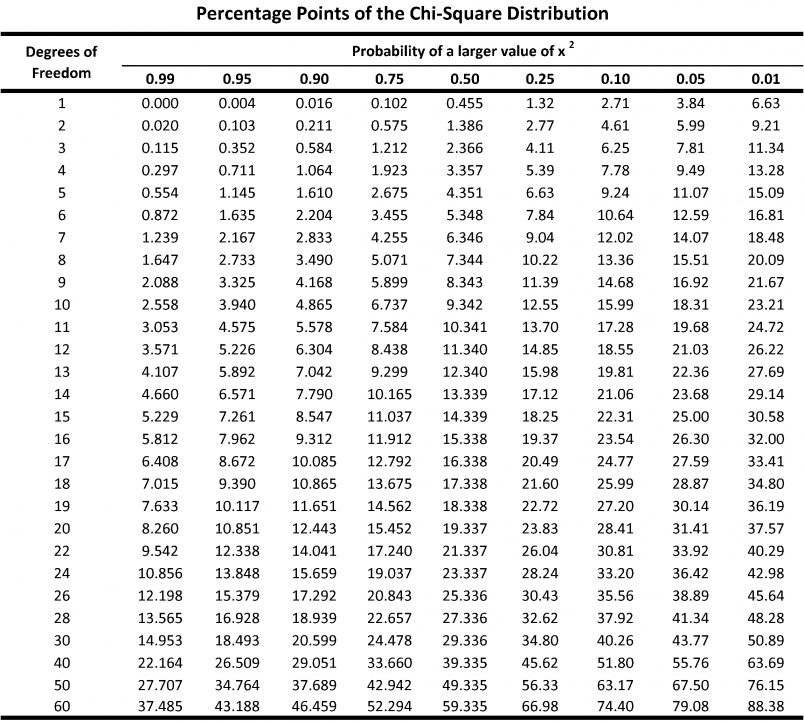

In [14]:
Image("http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG")

432 is hella larger then 3.84

why am i mentioning 3.84?

how does the chi square statistic that you derived compare?

please  state what that means in terms of your Null hypothesis in a markdown cell below!

## Why mention 3.84?
3.84 is the area of the $\chi^2$ distribution for 1 degree of freedom with an $\alpha = 5\%$.

Since the problem has a DOF of 1 and the significance level $\alpha$ was set to 5%, we should compare the value we got to this value on the $\chi^2$ distribution table.

## How does the $\chi^2$ statistic derived compare to 3.84?
432 is way too big to even compare in the table, but that's a good thing. We want a value that is greater than 3.84 because we want the probability to be lower than 5%.

## What does it mean in terms of the Null Hypothesis?
Because the value is bigger than 3.84 - which corresponds to a p-value of 0.05 already, we can safely say that we can reject the Null hypothesis.

# !!!!!! TODO FOR YOU!
lets see what the chi sq statistics says about the conviction for fellonies (row 10)


*START EDIT BY uc288*

|convicted of a fellony |          yes         |          no           |                   
|-----------------------|----------------------|-----------------------|------------|
| test sample           | 0.100 * 568 (56.8)   | 0.900 * 568 (511.2)   |    568     |
| control sample        | 0.117 * 409 (47.853) | 0.883 * 409 (361.147) |    409     |
|                       |                      |                       |            |
| total                 |      104.653         |        872.347        |    977     |

In [15]:
Ntot = 977 # a + b + c + d = tot

sample_values = np.array([[0.100 * 568, 0.900 * 568], [0.117 * 409, 0.883 * 409]])

print (evalChisq(sample_values))

0.718493917505


## Analysis

The $\chi^2$ statistic is 0.7185 which falls in between 0.455 (50%) and 1.32 (25%).

Given that, our p-value for this test is between 0.25 and 0.50 and that is not smaller than our $\alpha$ 0.05, we **CANNOT** reject our null hypothesis.

*END EDIT BY uc288*